<a href="https://colab.research.google.com/github/krit0885824924/Project-BeeAi/blob/main/ProjectBee(ver-%E0%B9%80%E0%B8%81%E0%B8%B7%E0%B8%AD%E0%B8%9A%E0%B9%80%E0%B8%AA%E0%B8%A3%E0%B9%87%E0%B8%88%E0%B9%81%E0%B8%A5%E0%B9%89%E0%B8%A7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
import numpy as np
import pandas as pd

In [4]:
from tqdm import tqdm

In [5]:
!dir

sample_data


In [6]:
from google.colab import drive
drive.mount("/content/drive/")
os.chdir("/content/drive/MyDrive/projectbee")

Mounted at /content/drive/


In [7]:
df = pd.read_csv('pollen_data.csv')
df

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0
...,...,...,...
709,709,NP64239-233r.jpg,0
710,710,NP10304-132r.jpg,0
711,711,NP28671-238r.jpg,0
712,712,P14163-218r.jpg,1


In [8]:
df['pollen_carrying'].value_counts()

1    369
0    345
Name: pollen_carrying, dtype: int64

In [9]:
import random 

In [10]:
random.seed(69420)

In [11]:
df['subset'] = random.choices([0,1,2],[0.8,0.1,0.1],k = len(df))
df

,Unnamed: 0,filename,pollen_carrying,subset
0,0,P10057-125r.jpg,1,0
1,1,P57380-120r.jpg,1,0
2,2,NP63671-221r.jpg,0,0
3,3,NP53776-47r.jpg,0,1
4,4,NP13382-201r.jpg,0,0
...,...,...,...,...
709,709,NP64239-233r.jpg,0,0
710,710,NP10304-132r.jpg,0,0
711,711,NP28671-238r.jpg,0,0
712,712,P14163-218r.jpg,1,2


In [12]:
import cv2

In [13]:
x = []
y = []
for i,a in tqdm(df.iterrows()):
    x.append(cv2.resize(cv2.imread('images/'+a.filename),(64,64))/255)
df['x'] = x

714it [03:33,  3.35it/s]


In [14]:
df

,Unnamed: 0,filename,pollen_carrying,subset,x
0,0,P10057-125r.jpg,1,0,"[[[0.6549019607843137, 0.5215686274509804, 0.2..."
1,1,P57380-120r.jpg,1,0,"[[[0.6039215686274509, 0.47058823529411764, 0...."
2,2,NP63671-221r.jpg,0,0,"[[[0.596078431372549, 0.4549019607843137, 0.21..."
3,3,NP53776-47r.jpg,0,1,"[[[0.5568627450980392, 0.43137254901960786, 0...."
4,4,NP13382-201r.jpg,0,0,"[[[0.5058823529411764, 0.4, 0.1764705882352941..."
...,...,...,...,...,...
709,709,NP64239-233r.jpg,0,0,"[[[0.5490196078431373, 0.43529411764705883, 0...."
710,710,NP10304-132r.jpg,0,0,"[[[0.6313725490196078, 0.5176470588235295, 0.2..."
711,711,NP28671-238r.jpg,0,0,"[[[0.4745098039215686, 0.34509803921568627, 0...."
712,712,P14163-218r.jpg,1,2,"[[[0.6274509803921569, 0.4980392156862745, 0.2..."


In [15]:
def gene(df,batch):
    while 1:
        x = []
        y = []
        sub = df.groupby('pollen_carrying').sample(int(batch/2))
        for i,a in sub.iterrows():
            x.append(a.x)
            y.append(a.pollen_carrying)
        yield np.array(x),np.array(y) 

In [16]:
x,y = next(gene(df,18))

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
from tensorflow.keras import layers

In [19]:
inputs = layers.Input(shape=(64,64,3))
x = tf.keras.layers.Conv2D(32,(3,3),padding="same")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32,activation='relu')(x)
x = layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=x)
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), metrics=["accuracy"])

In [21]:
test = model.fit(gene(df[df.subset == 0],90),epochs=20
                ,validation_data=(gene(df[df.subset == 1],45))
                ,steps_per_epoch=10
                ,validation_steps=10)

Epoch 1/20
10/10 [==============================] - 5s 530ms/step - loss: 0.9348 - accuracy: 0.6633 - val_loss: 0.6445 - val_accuracy: 0.7500
Epoch 2/20
10/10 [==============================] - 5s 506ms/step - loss: 0.3604 - accuracy: 0.8278 - val_loss: 0.6306 - val_accuracy: 0.8295
Epoch 3/20
10/10 [==============================] - 5s 508ms/step - loss: 0.2421 - accuracy: 0.8889 - val_loss: 0.6162 - val_accuracy: 0.8068
Epoch 4/20
10/10 [==============================] - 5s 509ms/step - loss: 0.1800 - accuracy: 0.9267 - val_loss: 0.6045 - val_accuracy: 0.7591
Epoch 5/20
10/10 [==============================] - 5s 508ms/step - loss: 0.1799 - accuracy: 0.9278 - val_loss: 0.6047 - val_accuracy: 0.6864
Epoch 6/20
10/10 [==============================] - 5s 507ms/step - loss: 0.1227 - accuracy: 0.9744 - val_loss: 0.5811 - val_accuracy: 0.7636
Epoch 7/20
10/10 [==============================] - 5s 507ms/step - loss: 0.0965 - accuracy: 0.9733 - val_loss: 0.5743 - val_accuracy: 0.7909
Epoch 

In [22]:
model.evaluate(gene(df[df.subset == 2],50),steps=100)

100/100 [==============================] - 6s 64ms/step - loss: 0.3802 - accuracy: 0.9138


[0.38021498918533325, 0.9138000011444092]

In [23]:
test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

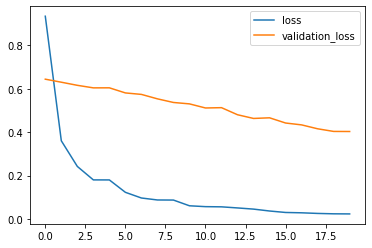

In [24]:
import matplotlib.pyplot as plt
plt.plot(test.history['loss'],label='loss')
plt.plot(test.history['val_loss'],label='validation_loss')
plt.legend()

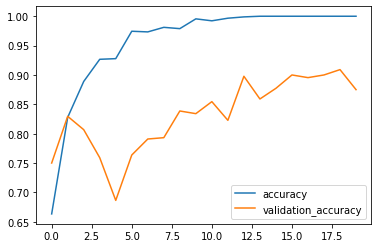

In [25]:
plt.plot(test.history['accuracy'],label='accuracy')
plt.plot(test.history['val_accuracy'],label='validation_accuracy')
plt.legend()

In [26]:
model.save('bee.h5')

In [27]:
print(np.shape(df.iloc[0]['x']))

(64, 64, 3)


In [28]:
def test_image(n):
  img = df.iloc[n]['x']
  img = np.array(img+img)
  return model.predict(img)[0]

In [29]:
def test_image(n):   
  img = df.iloc[n]['x']
  plt.imshow(df.iloc[n]['x'])
  plt.imshow(df.iloc[n]['x'][:, :, ::-1])
  img = np.array([img for i in range(2)])   
  return model.predict(img)[0]

array([0.19964617], dtype=float32)

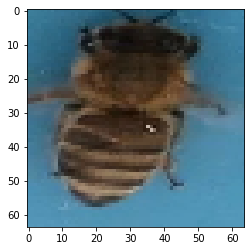

In [35]:
test_image(7)